In [102]:
import pandas as pd
from gensim import models
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import *

In [103]:
trainDF = pd.read_csv("Data/train.csv")
testDF = pd.read_csv("Data/test.csv")

trainDF.question1.fillna('abc', inplace=True)
trainDF.question2.fillna('abc', inplace=True)

In [104]:
def cleanQuestion(question):
    """Functions to clean question pairs
    """
    # convert to lower case
    question = question.lower()
#     question = question.replace()
    question = question.decode('utf-8')
    stop = stopwords.words('english')
    stemmer = PorterStemmer()
    questions = re.sub(r'[^\x00-\x7F]+', ' ', question, flags=re.MULTILINE)
    question = ' '.join([word for word in question.split() if word not in stop])
    question = ' '.join([stemmer.stem(word) for words in question.split()])
    # remove extra spaces
    question = re.sub(r'[\s]+', ' ', question, flags=re.MULTILINE)
    # remove all punctuations
    question = re.sub(r'[^a-zA-Z]', ' ', question, flags=re.MULTILINE)
    return question


In [105]:
def getLabeledSentence(questions, label):
    labeledQuestions=[]
    for uid, line in enumerate(questions):
        labeledQuestions.append( models.doc2vec.LabeledSentence(words=line.split(), tags=[label+str(uid)]))
    
    return labeledQuestions

In [106]:
trainDF.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
trainDF.question1 = trainDF.question1.apply(cleanQuestion)
trainDF.question2 = trainDF.question2.apply(cleanQuestion)

In [ ]:
trainDF.head()

In [ ]:
labeledQuestions1 = getLabeledSentence(trainDF.question1.tolist(), 'question1')
labeledQuestions2 = getLabeledSentence(trainDF.question2.tolist(), 'question2')

In [ ]:
model = models.Doc2Vec(alpha=.025, min_alpha=.025, min_count=1)
labeledQuestions = labeledQuestions1 + labeledQuestions2

In [ ]:
model.build_vocab(labeledQuestions)

In [ ]:
model.train(labeledQuestions)
# for epoch in range(10):
#     model.train(labeledQuestions)
#     model.alpha -= 0.002  # decrease the learning rate`
#     model.min_alpha = model.alpha # fix the learning rate, no decay

In [ ]:
model.save('Models/4_22model_processed')# 35900484 for raw

In [56]:
model_loaded = models.Doc2Vec.load('Models/4_8model')

In [ ]:
similarity = []
for i in range(len(labeledQuestions1)):
    similarity.append(model.docvecs.similarity('question1%d'%i, 'question2%d'%i))

In [ ]:
similarityDF = pd.DataFrame({'similarity': similarity})
similarityDF['y'] = trainDF.is_duplicate

In [ ]:
similarityDF.head()

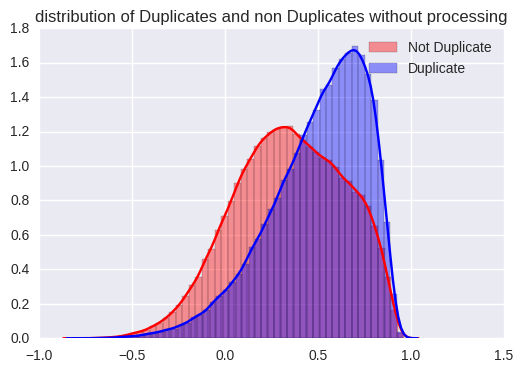

In [101]:
#stop
import seaborn as sns
%matplotlib inline
ax = sns.distplot(similarityDF[similarityDF.y==0].similarity.tolist(), hist=True, label="Not Duplicate", color='red')
ax = sns.distplot(similarityDF[similarityDF.y==1].similarity.tolist(), hist=True, label="Duplicate", color='blue')
ax.axes.set_title("distribution of Duplicates and non Duplicates without processing")
ax.legend()

In [ ]:
import seaborn as sns
%matplotlib inline
ax = sns.distplot(similarityDF[similarityDF.y==0].similarity.tolist(), hist=True, label="Not Duplicate", color='red')
ax = sns.distplot(similarityDF[similarityDF.y==1].similarity.tolist(), hist=True, label="Duplicate", color='blue')\
ax.title("distribution of Duplicates and non Duplicates with processing")
ax.legend()

In [ ]:
vectors1 = []
vectors2 = []
print "Fetching Vectors..."
for i in range(len(labeledQuestions1)*2):
    if i< len(labeledQuestions1):
        vectors1.append(model.docvecs[i])
    else:
        vectors2.append(model.docvecs[i])
import ipdb; ipdb.set_trace()

vectors1 = np.asarray(vectors1)
vectors2 = np.asarray(vectors2)

labels = np.asarray(train.is_duplicate)
